In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import h5py as hdf
import scipy as scp

plt.rcParams['figure.facecolor'] = 'white'

In [269]:
positions=pd.read_excel('Y:\\Istra Repositories\\ch-gr_exports\\Querzug_overview.xlsx')
positions.name=positions.name+'_clipped_cut_lined'
positions=positions.iloc[:,1:].set_index('name')
display(positions)

,ok,crack,pos,left_12-5,step_start,step_stop
name,,,,,,
MC_A_6xi_clipped_cut_lined,1.0,135.0,143.0,123.0,110.0,230.0
MC_A_6xiii_clipped_cut_lined,1.0,115.0,119.0,99.0,45.0,187.5
MC_A_6yi_clipped_cut_lined,2.0,114.0,117.0,97.0,NaN,NaN
MC_A_6yii_clipped_cut_lined,2.0,47.0,50.0,30.0,NaN,NaN
MC_A_6yiii_clipped_cut_lined,2.0,100.0,95.0,75.0,NaN,NaN
...,...,...,...,...,...,...
QL_GW_8xi_clipped_cut_lined,3.0,NaN,NaN,-20.0,40.0,387.5
QL_GW_8xii_clipped_cut_lined,1.0,125.0,125.0,105.0,247.5,580.0
QL_GW_8xiii_clipped_cut_lined,3.0,NaN,NaN,-20.0,NaN,NaN


In [270]:
import os
import re

def gather_files_regex(dir: str,regex)->list:
    '''
    Gathers all files below a directory that match the provided regular expression
    Traverses into sub-directories

    dir -- the directory

    regex -- A regular expression to match filenames
    '''
    subdir=dir
    p = re.compile(regex)
    data=[]
    for dir, _, files in os.walk(subdir):
        for name in files:
            if p.match(name):
                b=(str(os.path.join(dir, name)))
                data.append(b)
    return data

files=gather_files_regex('Y:\\Istra Repositories\\ch-gr_exports',r'\w+ned.pickle\Z')
display(files)

['Y:\\Istra Repositories\\ch-gr_exports\\MC_A_6xiii_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_6xi_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8xiii_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_6xiii_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_6xii_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_6xi_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_8xiii_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_8xi_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_8yi_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_GW_6xiii_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_GW_6xi_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_GW_6yiii_clipped_cut_lined.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_GW_6yii_clipped_

In [271]:
sample='MC_A_8xiii_clipped_cut'
samplelocation='Y:\\Istra Repositories\\ch-gr_exports\\'+sample+'.pickle'
lookup=pd.read_pickle(samplelocation,compression='zip')

In [272]:
over_df_index=[x.split('\\')[-1].split('.')[0] for x in files]
tests_df=pd.DataFrame(index=over_df_index)
tests_df['paths']=files
tests_df=tests_df.join(positions,how='left')
tests_df['index']=tests_df.index
tests_df['material']=tests_df['index'].apply(lambda x: x.split('_')[0])
tests_df['senergie/GW']=tests_df['index'].apply(lambda x: x.split('_')[1])
tests_df['plate_thickness']=tests_df['index'].apply(lambda x: x.split('_')[2][0])
tests_df['testspeed']=tests_df['index'].apply(lambda x: x.split('_')[2][1])
tests_df['running_number']=tests_df['index'].apply(lambda x: x.split('_')[2][2:])
tests_df['data']=[pd.read_pickle(x, compression='zip') for x in tests_df['paths']]
display(tests_df.head(5))
#plt.plot(tests_df.crack)

,paths,ok,crack,pos,left_12-5,step_start,step_stop,index,material,senergie/GW,plate_thickness,testspeed,running_number,data
MC_A_6xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii...,1.0,115.0,119.0,99.0,45.0,187.5,MC_A_6xiii_clipped_cut_lined,MC,A,6,x,iii,group ...
MC_A_6xi_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_6xi_c...,1.0,135.0,143.0,123.0,110.0,230.0,MC_A_6xi_clipped_cut_lined,MC,A,6,x,i,group ...
MC_A_8xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii...,1.0,170.0,117.5,97.5,32.5,355.0,MC_A_8xiii_clipped_cut_lined,MC,A,8,x,iii,group ...
MC_B_6xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_B_6xiii...,1.0,90.0,90.0,70.0,37.5,172.5,MC_B_6xiii_clipped_cut_lined,MC,B,6,x,iii,group ...
MC_B_6xii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_B_6xii_...,1.0,122.0,121.0,101.0,27.5,160.0,MC_B_6xii_clipped_cut_lined,MC,B,6,x,ii,group ...


In [273]:
#display(test.data)

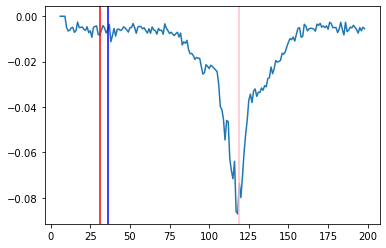

In [325]:
test=tests_df.data[0]
sample=tests_df['index'][0]
def array_get_mask(array:np.ndarray)->pd.DataFrame:
    df=pd.DataFrame(array)
    after=df.copy()
    after[after==0.]=np.nan
    after=np.divide(after,after)
    return(after)
#mask=array_get_mask(test.iloc[10,:][('strains','strain_p1')])
#plt.matshow(mask)
def df_apply_mask(arr:np.ndarray,mask:np.ndarray)-> pd.DataFrame:
    after=np.multiply(arr,mask)
    after=pd.DataFrame(after)
    after.dropna(how='all',axis=0,inplace=True)
    after.dropna(how='all',axis=1,inplace=True)
    return(after)
#plt.matshow(df_apply_mask(array_get_mask(test.iloc[10,:][('strains','strain_p1')]),mask))
def df_strip_nans(df):
    after=df.copy()
    after.dropna(how='all',axis=0,inplace=True)
    after.dropna(how='all',axis=1,inplace=True)
    return(after)
def df_get_idx_from_mm(sample:str,data:pd.DataFrame,sdix,cdix,left:int,right:int):
    mask=array_get_mask(data.iloc[10,:][('strains','strain_p1')])
    horizontal_measured_mm=data.iloc[10,:][('coordinates','coordinate_y')]
    measurement_dict=horizontal_measured_mm.to_dict()
    measurement_lookup_df=pd.DataFrame(data=measurement_dict.values(), index=measurement_dict.keys(),columns=['mm'])
    #display(measurement_lookup_df)
    crack_idx=int(cdix)
    seam_idx=int(sdix)

    seam_pos_y_mm=measurement_lookup_df.loc[seam_idx,'mm']
    left_pos_y_mm=seam_pos_y_mm-left
    right_pos_y_mm=seam_pos_y_mm-right

    left_pos_y_idx=measurement_lookup_df.iloc[(measurement_lookup_df['mm']-left_pos_y_mm).abs().argsort()[:1]].index.tolist()[0]
    right_pos_y_idx=measurement_lookup_df.iloc[(measurement_lookup_df['mm']-right_pos_y_mm).abs().argsort()[:1]].index.tolist()[0]

    """fig,ax=plt.subplots(figsize=(20,5))
    ax.matshow(df_apply_mask(data.iloc[150,:][('strains','strain_p1')],mask))
    ax.axvline(left_pos_y_idx,c='red')
    ax.axvline(right_pos_y_idx,c='yellow')
    plt.show()"""
    return(seam_idx,left_pos_y_idx,right_pos_y_idx)
def df_extract_roi_on_idx(roi_base,left,right):
    roi_base=pd.DataFrame(roi_base).copy()

    roi_base.loc[:,:left]=np.nan
    roi_base.loc[:,right:]=np.nan
    return(roi_base)
#df_get_idx_from_mm(sample,lookup,positions,-20,-18)
borders=df_get_idx_from_mm(sample,test,119.0,115.0,-35,-33)
fig,ax=plt.subplots()
ax.plot(tests_df.data[0].iloc[-10,6])#.loc[borders[1]:borders[2]])
ax.axvline(borders[1],color='red')
ax.axvline(borders[2],color='blue')
ax.axvline(borders[0],color='pink')
plt.show()
#plt.matshow(df_strip_nans(df_extract_roi_on_idx(df_apply_mask(array_get_mask(test.iloc[130,:][('strains','strain_p1')]),mask),borders[1],borders[2])))

In [326]:
display(test.iloc[0,3])



6     -23.113460
7     -23.174919
8     -23.230551
9     -23.275849
10    -23.328638
         ...    
194   -15.198407
195   -15.143376
196   -15.103652
197   -15.046472
198   -15.002882
Length: 193, dtype: float64

,paths,ok,crack,pos,left_12-5,step_start,step_stop,index,material,senergie/GW,...,25_27 _rp02_idx,27_29 _rp02_idx,29_31 _rp02_idx,31_33 _rp02_idx,33_35 _rp02_idx,Rp,Rpinclpos,post,Rpatsteps,Rpinclposstep
MC_A_6xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii...,1.0,115.0,119.0,99.0,45.0,187.5,MC_A_6xiii_clipped_cut_lined,MC,A,...,128,105,106,121,98,"[1204.4481996886757, 1128.5487458455787, 1188....","[1204.4481996886757_-34.0_[104, 139, 97, 99, 1...","[1204.4481996886757, 1128.5487458455787, 1188....","[104, 139, 97, 99, 102, 95, 94, 95, 85, 78, 60...","[1204.4481996886757_-34.0_104, 1128.5487458455..."
MC_A_6xi_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_6xi_c...,1.0,135.0,143.0,123.0,110.0,230.0,MC_A_6xi_clipped_cut_lined,MC,A,...,93,93,93,93,93,"[1203.8424897133077, 1181.0288628405992, 1217....","[1203.8424897133077_-34.0_[99, 92, 90, 91, 93,...","[1203.8424897133077, 1181.0288628405992, 1217....","[99, 92, 90, 91, 93, 92, 91, 83, 72, 65, 62, 6...","[1203.8424897133077_-34.0_99, 1181.02886284059..."
MC_A_8xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii...,1.0,170.0,117.5,97.5,32.5,355.0,MC_A_8xiii_clipped_cut_lined,MC,A,...,109,112,113,117,121,"[1219.270807317664, 1188.6837439676333, 1187.9...","[1219.270807317664_-34.0_[132, 127, 126, 124, ...","[1219.270807317664, 1188.6837439676333, 1187.9...","[132, 127, 126, 124, 121, 115, 111, 107, 103, ...","[1219.270807317664_-34.0_132, 1188.68374396763..."
MC_B_6xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_B_6xiii...,1.0,90.0,90.0,70.0,37.5,172.5,MC_B_6xiii_clipped_cut_lined,MC,B,...,49,106,95,123,121,"[-1000.4206839485282, -436.549963555648, -268....","[-1000.4206839485282_-34.0_[4, 58, 134, 134, 1...","[-1000.4206839485282, -436.549963555648, -268....","[4, 58, 134, 134, 134, 100, 100, 134, 92, 124,...","[-1000.4206839485282_-34.0_4, -436.54996355564..."
MC_B_6xii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_B_6xii_...,1.0,122.0,121.0,101.0,27.5,160.0,MC_B_6xii_clipped_cut_lined,MC,B,...,122,112,100,130,132,"[743.6838599003045, 913.5642766552933, 1029.94...","[743.6838599003045_-34.0_[59, 78, 130, 130, 13...","[743.6838599003045, 913.5642766552933, 1029.94...","[59, 78, 130, 130, 132, 132, 82, 84, 132, 69, ...","[743.6838599003045_-34.0_59, 913.5642766552933..."


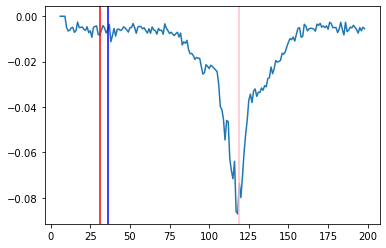

In [327]:
def idx_runner(tests_df):
    tests_df['-35_-33_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-35,-33))
    tests_df['-33_-31_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-33,-31))
    tests_df['-31_-29_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-31,-29))
    tests_df['-29_-27_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-29,-27))
    tests_df['-27_-25_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-27,-25))
    tests_df['-25_-23_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-25,-23))
    tests_df['-23_-21_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-23,-21))
    tests_df['-21_-19_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-21,-19))
    tests_df['-19_-17_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-19,-17))
    tests_df['-17_-15_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-17,-15))
    tests_df['-15_-13_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-15,-13))
    tests_df['-13_-11_idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-13,-11))
    tests_df['-11_-9 _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-11,-9))
    tests_df['-9_-7  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-9,-7))
    tests_df['-7_-5  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-7,-5))
    tests_df['-5_-3  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-5,-3))
    tests_df['-3_-1  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-3,-1))
    tests_df['-1_1   _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],-1,1))
    tests_df['1_3    _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],1,3))
    tests_df['3_5    _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],3,5))
    tests_df['5_7    _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],5,7))
    tests_df['7_9    _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],7,9))
    tests_df['9_11   _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],9,11))
    tests_df['11_13  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],11,13))
    tests_df['13_15  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],13,15))
    tests_df['15_17  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],15,17))
    tests_df['17_19  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],17,19))
    tests_df['19_21  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],19,21))
    tests_df['21_23  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],21,23))
    tests_df['23_25  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],23,25))
    tests_df['25_27  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],25,27))
    tests_df['27_29  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],27,29))
    tests_df['29_31  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],29,31))
    tests_df['31_33  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],31,33))
    tests_df['33_35  _idxs']  =  tests_df['index'].apply(lambda x:df_get_idx_from_mm(x,tests_df.loc[x,'data'],tests_df.loc[x,'pos'],tests_df.loc[x,'crack'],33,35))
    return (tests_df)
tests_df=idx_runner(tests_df)
display(tests_df.head())

fig,ax=plt.subplots()
ax.plot(tests_df.data[0].iloc[-10,6])
ax.axvline(tests_df['-35_-33_idxs'][0][1],color='red')
ax.axvline(tests_df['-35_-33_idxs'][0][2],color='blue')
ax.axvline(tests_df['-35_-33_idxs'][0][0],color='pink')
plt.show()
test=tests_df

Index(['paths', 'ok', 'crack', 'pos', 'left_12-5', 'step_start', 'step_stop',
       'index', 'material', 'senergie/GW',
       ...
       '25_27  _rp02_idx', '27_29  _rp02_idx', '29_31  _rp02_idx',
       '31_33  _rp02_idx', '33_35  _rp02_idx', 'Rp', 'Rpinclpos', 'post',
       'Rpatsteps', 'Rpinclposstep'],
      dtype='object', length=199)

(142, 10)

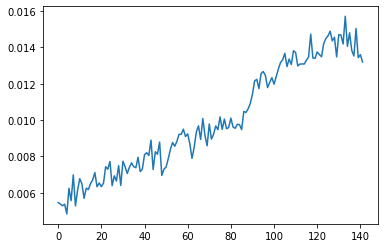

In [328]:

def df_loc_strain(df,left,right):
    strain_p1=[]
    for i in df.index:
        strain_p1.append(df.loc[i,(      'strains',          'strain_p1')].loc[left:right].mean())
    #display(strain_p1)
    #plt.plot(strain_p1)
    return(strain_p1)

display(tests_df.columns)
plt.plot(df_loc_strain(tests_df.data[0],tests_df['15_17  _idxs'][0][1],tests_df['15_17  _idxs'][0][2]))
display(tests_df.data[0].shape)

Index(['paths', 'ok', 'crack', 'pos', 'left_12-5', 'step_start', 'step_stop',
       'index', 'material', 'senergie/GW',
       ...
       '25_27  _rp02_idx', '27_29  _rp02_idx', '29_31  _rp02_idx',
       '31_33  _rp02_idx', '33_35  _rp02_idx', 'Rp', 'Rpinclpos', 'post',
       'Rpatsteps', 'Rpinclposstep'],
      dtype='object', length=199)

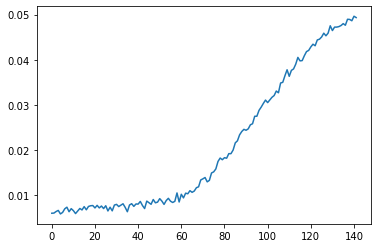

In [329]:
tests_df['-35_-33_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-35_-33_idxs'][1],tests_df.loc[i,'-35_-33_idxs'][2]) for i in tests_df.index]
tests_df['-33_-31_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-33_-31_idxs'][1],tests_df.loc[i,'-33_-31_idxs'][2]) for i in tests_df.index]
tests_df['-31_-29_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-31_-29_idxs'][1],tests_df.loc[i,'-31_-29_idxs'][2]) for i in tests_df.index]
tests_df['-29_-27_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-29_-27_idxs'][1],tests_df.loc[i,'-29_-27_idxs'][2]) for i in tests_df.index]
tests_df['-27_-25_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-27_-25_idxs'][1],tests_df.loc[i,'-27_-25_idxs'][2]) for i in tests_df.index]
tests_df['-25_-23_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-25_-23_idxs'][1],tests_df.loc[i,'-25_-23_idxs'][2]) for i in tests_df.index]
tests_df['-23_-21_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-23_-21_idxs'][1],tests_df.loc[i,'-23_-21_idxs'][2]) for i in tests_df.index]
tests_df['-21_-19_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-21_-19_idxs'][1],tests_df.loc[i,'-21_-19_idxs'][2]) for i in tests_df.index]
tests_df['-19_-17_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-19_-17_idxs'][1],tests_df.loc[i,'-19_-17_idxs'][2]) for i in tests_df.index]
tests_df['-17_-15_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-17_-15_idxs'][1],tests_df.loc[i,'-17_-15_idxs'][2]) for i in tests_df.index]
tests_df['-15_-13_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-15_-13_idxs'][1],tests_df.loc[i,'-15_-13_idxs'][2]) for i in tests_df.index]
tests_df['-13_-11_strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-13_-11_idxs'][1],tests_df.loc[i,'-13_-11_idxs'][2]) for i in tests_df.index]
tests_df['-11_-9 _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-11_-9 _idxs'][1],tests_df.loc[i,'-11_-9 _idxs'][2]) for i in tests_df.index]
tests_df['-9_-7  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-9_-7  _idxs'][1],tests_df.loc[i,'-9_-7  _idxs'][2]) for i in tests_df.index]
tests_df['-7_-5  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-7_-5  _idxs'][1],tests_df.loc[i,'-7_-5  _idxs'][2]) for i in tests_df.index]
tests_df['-5_-3  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-5_-3  _idxs'][1],tests_df.loc[i,'-5_-3  _idxs'][2]) for i in tests_df.index]
tests_df['-3_-1  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-3_-1  _idxs'][1],tests_df.loc[i,'-3_-1  _idxs'][2]) for i in tests_df.index]
tests_df['-1_1   _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'-1_1   _idxs'][1],tests_df.loc[i,'-1_1   _idxs'][2]) for i in tests_df.index]
tests_df['1_3    _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'1_3    _idxs'][1],tests_df.loc[i,'1_3    _idxs'][2]) for i in tests_df.index]
tests_df['3_5    _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'3_5    _idxs'][1],tests_df.loc[i,'3_5    _idxs'][2]) for i in tests_df.index]
tests_df['5_7    _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'5_7    _idxs'][1],tests_df.loc[i,'5_7    _idxs'][2]) for i in tests_df.index]
tests_df['7_9    _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'7_9    _idxs'][1],tests_df.loc[i,'7_9    _idxs'][2]) for i in tests_df.index]
tests_df['9_11   _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'9_11   _idxs'][1],tests_df.loc[i,'9_11   _idxs'][2]) for i in tests_df.index]
tests_df['11_13  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'11_13  _idxs'][1],tests_df.loc[i,'11_13  _idxs'][2]) for i in tests_df.index]
tests_df['13_15  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'13_15  _idxs'][1],tests_df.loc[i,'13_15  _idxs'][2]) for i in tests_df.index]
tests_df['15_17  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'15_17  _idxs'][1],tests_df.loc[i,'15_17  _idxs'][2]) for i in tests_df.index]
tests_df['17_19  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'17_19  _idxs'][1],tests_df.loc[i,'17_19  _idxs'][2]) for i in tests_df.index]
tests_df['19_21  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'19_21  _idxs'][1],tests_df.loc[i,'19_21  _idxs'][2]) for i in tests_df.index]
tests_df['21_23  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'21_23  _idxs'][1],tests_df.loc[i,'21_23  _idxs'][2]) for i in tests_df.index]
tests_df['23_25  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'23_25  _idxs'][1],tests_df.loc[i,'23_25  _idxs'][2]) for i in tests_df.index]
tests_df['25_27  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'25_27  _idxs'][1],tests_df.loc[i,'25_27  _idxs'][2]) for i in tests_df.index]
tests_df['27_29  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'27_29  _idxs'][1],tests_df.loc[i,'27_29  _idxs'][2]) for i in tests_df.index]
tests_df['29_31  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'29_31  _idxs'][1],tests_df.loc[i,'29_31  _idxs'][2]) for i in tests_df.index]
tests_df['31_33  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'31_33  _idxs'][1],tests_df.loc[i,'31_33  _idxs'][2]) for i in tests_df.index]
tests_df['33_35  _strain_p1']  = [ df_loc_strain(tests_df.loc[i,'data'],tests_df.loc[i,'33_35  _idxs'][1],tests_df.loc[i,'33_35  _idxs'][2]) for i in tests_df.index]
display(tests_df.columns)
plt.plot(tests_df['9_11   _strain_p1'][0])


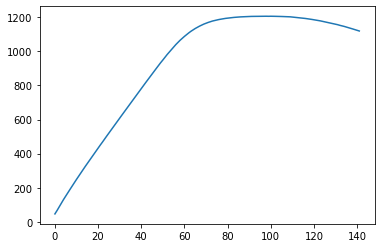

In [330]:
def force_extractor(series):
    series=series.copy()
    force=[]
    for i in series.index:
        series[i]=series[i][0][0]

    return(series)
#display(force_extractor(tests_df.loc['MC_A_6xiii_clipped_cut_lined','data'][(     'add_data',    'analog_channels')]))
tests_df['force']= [force_extractor(tests_df.loc[i,'data'][(     'add_data',    'analog_channels')]*60000) for i in tests_df.index]
mapper={8:25,6:20}##Martin nach genauen Maßen fragen
tests_df['plate_width']=tests_df.plate_thickness.astype(int).map(mapper)
tests_df['sample_crossection']=tests_df['plate_width']*tests_df.plate_thickness.astype(int)
tests_df['stress']=[[f/tests_df.loc[i,'sample_crossection']for f in tests_df.loc[i,'force']] for i in tests_df.index]
plt.plot(tests_df.stress[0])
#plt.plot(tests_df.force[0])
#plt.plot(tests_df.plate_width)
from scipy.signal import savgol_filter as savgol
#plt.plot(savgol(tests_df['25_27  _strain_p1'][0],51,4),tests_df['stress'][0])
#plt.plot(tests_df['25_27  _strain_p1'][0],tests_df['stress'][0])

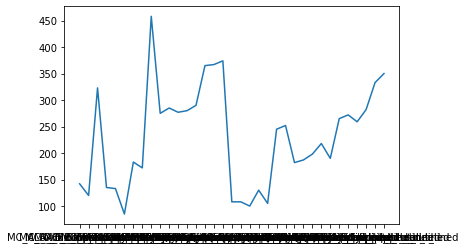

In [331]:
tests_df['data_len']=[len(tests_df.loc[i,'data']) for i in tests_df.index]
plt.plot(tests_df.data_len)

In [332]:
display(tests_df.columns)


Index(['paths', 'ok', 'crack', 'pos', 'left_12-5', 'step_start', 'step_stop',
       'index', 'material', 'senergie/GW',
       ...
       '25_27  _rp02_idx', '27_29  _rp02_idx', '29_31  _rp02_idx',
       '31_33  _rp02_idx', '33_35  _rp02_idx', 'Rp', 'Rpinclpos', 'post',
       'Rpatsteps', 'Rpinclposstep'],
      dtype='object', length=199)

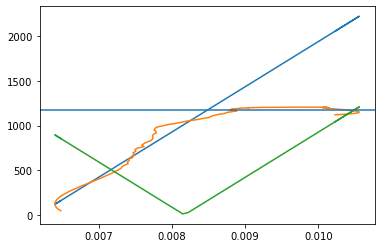

MC_A_6xiii_clipped_cut_lined      [427073.7643967283, -2200.3614753409815]
MC_A_6xi_clipped_cut_lined       [491704.28304005344, -2910.7556987261332]
MC_A_8xiii_clipped_cut_lined       [133120.0355083282, -164.1044848582177]
MC_B_6xiii_clipped_cut_lined     [347203.55059837643, -1461.7671010312138]
MC_B_6xii_clipped_cut_lined        [422709.9094760347, -2319.038439164081]
MC_B_6xi_clipped_cut_lined         [895875.4772664716, -5690.201599176763]
MC_B_8xiii_clipped_cut_lined          [337989.44029977, -1357.30680101446]
MC_B_8xi_clipped_cut_lined        [316045.8291329083, -1512.4648280855681]
MC_B_8yi_clipped_cut_lined       [-2310.672276842705, -28.428842326131168]
MC_GW_6xiii_clipped_cut_lined      [169320.830049105, -1240.6302610595194]
MC_GW_6xi_clipped_cut_lined       [118622.70919097074, -857.6866853258347]
MC_GW_6yiii_clipped_cut_lined      [841896.0707981827, -6685.074951260679]
MC_GW_6yii_clipped_cut_lined       [488253.9019949104, -711.0003351903969]
MC_GW_6yi_clipped_cut_lin

MC_A_6xiii_clipped_cut_lined     1232.911463
MC_A_6xi_clipped_cut_lined       1043.971622
MC_A_8xiii_clipped_cut_lined     1211.429745
MC_B_6xiii_clipped_cut_lined      971.233891
MC_B_6xii_clipped_cut_lined       938.593585
MC_B_6xi_clipped_cut_lined       1029.909821
MC_B_8xiii_clipped_cut_lined      991.083387
MC_B_8xi_clipped_cut_lined        996.222307
MC_B_8yi_clipped_cut_lined        -45.271885
MC_GW_6xiii_clipped_cut_lined    1053.246651
MC_GW_6xi_clipped_cut_lined      2222.466604
MC_GW_6yiii_clipped_cut_lined    1667.083721
MC_GW_6yii_clipped_cut_lined     4932.034545
MC_GW_6yi_clipped_cut_lined      4998.183911
MC_GW_8xi_clipped_cut_lined      1172.508925
MC_GW_8yiii_clipped_cut_lined    2950.772168
MC_GW_8yii_clipped_cut_lined     3048.838716
QL_A_6xiii_clipped_cut_lined     1003.796260
QL_A_6xii_clipped_cut_lined       937.244770
QL_A_6xi_clipped_cut_lined       1151.453441
QL_A_8xii_clipped_cut_lined      1167.754467
QL_A_8xi_clipped_cut_lined       1039.538363
QL_A_8yiii

MC_A_6xiii_clipped_cut_lined      65
MC_A_6xi_clipped_cut_lined        60
MC_A_8xiii_clipped_cut_lined      89
MC_B_6xiii_clipped_cut_lined      58
MC_B_6xii_clipped_cut_lined       56
MC_B_6xi_clipped_cut_lined        54
MC_B_8xiii_clipped_cut_lined      80
MC_B_8xi_clipped_cut_lined        75
MC_B_8yi_clipped_cut_lined       204
MC_GW_6xiii_clipped_cut_lined     15
MC_GW_6xi_clipped_cut_lined       34
MC_GW_6yiii_clipped_cut_lined     10
MC_GW_6yii_clipped_cut_lined     114
MC_GW_6yi_clipped_cut_lined      235
MC_GW_8xi_clipped_cut_lined       61
MC_GW_8yiii_clipped_cut_lined    121
MC_GW_8yii_clipped_cut_lined     121
QL_A_6xiii_clipped_cut_lined      58
QL_A_6xii_clipped_cut_lined       59
QL_A_6xi_clipped_cut_lined        61
QL_A_8xii_clipped_cut_lined       86
QL_A_8xi_clipped_cut_lined        95
QL_A_8yiii_clipped_cut_lined     165
QL_A_8yi_clipped_cut_lined       164
QL_B_6xiii_clipped_cut_lined      53
QL_B_8xiii_clipped_cut_lined      71
QL_B_8xii_clipped_cut_lined       74
Q

In [345]:
def emod(start,end,stress,strain):
    #print(start,end)
    #print(type(stress),type(strain))
    strain=np.array(strain)
    strainc=strain[range(start,end)]
    stress=np.array(stress)
    stressc=np.array(stress[range(start,end)])
    #plt.plot((strainc),(stressc))
    try:
        z=np.polyfit(list(strainc), list(stressc), 1)
        p=np.poly1d(z)
        emod=z
        n=[p(x) for x in strainc]
        return(emod,n)
    except:
        return ([[180000,5]])
def rp02 (emod,stress,strain):
    df=pd.DataFrame()
    df['stress']=stress
    df['strain']=strain
    df['rpcurve']=(df.strain*emod[0]+emod[1])-(0.002*emod[0])
    idx=df.iloc[(df['stress']-df['rpcurve']).abs().argsort()[:1]].index.tolist()[0]
    #print(idx,df.loc[idx,'stress'],df.loc[idx,'rpcurve'])
    return (df.loc[idx,'rpcurve'],idx)

def smoothing(strain):
    try:
        return(savgol(strain,51,4))
    except:
        return strain

E=emod(0,int(len(tests_df['stress'][0])*0.3),tests_df['stress'][0],savgol(tests_df['25_27  _strain_p1'][0],51,4))[0]
rp=(rp02(E,tests_df['stress'][0],savgol(tests_df['25_27  _strain_p1'][0],51,4))[0])
fig,ax=plt.subplots()
ax.plot(savgol(tests_df['25_27  _strain_p1'][0],51,4),
         [x*E[0]+E[1] for x in savgol(tests_df['25_27  _strain_p1'][0],51,4)]

         )
ax.plot(savgol(tests_df['25_27  _strain_p1'][0],51,4),
         tests_df['stress'][0]

         )
ax.plot(savgol(tests_df['25_27  _strain_p1'][0],51,4),
         [abs((x*E[0]+E[1])-(0.002*E[0])) for x in savgol(tests_df['25_27  _strain_p1'][0],51,4)]

         )
ax.axhline(rp)
plt.show()

#for i in test.index[:-3]:
#    print(i)
#    plt.plot(savgol(tests_df.loc[i,'-33_-31_strain_p1'],41,4))
tests_df['-35_-33_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-35_-33_strain_p1']))[0] for i in tests_df.index]
tests_df['-33_-31_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-33_-31_strain_p1']))[0] for i in tests_df.index]
tests_df['-31_-29_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-31_-29_strain_p1']))[0] for i in tests_df.index]
tests_df['-29_-27_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-29_-27_strain_p1']))[0] for i in tests_df.index]
tests_df['-27_-25_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-27_-25_strain_p1']))[0] for i in tests_df.index]
tests_df['-25_-23_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-25_-23_strain_p1']))[0] for i in tests_df.index]
tests_df['-23_-21_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-23_-21_strain_p1']))[0] for i in tests_df.index]
tests_df['-21_-19_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-21_-19_strain_p1']))[0] for i in tests_df.index]
tests_df['-19_-17_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-19_-17_strain_p1']))[0] for i in tests_df.index]
tests_df['-17_-15_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-17_-15_strain_p1']))[0] for i in tests_df.index]
tests_df['-15_-13_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-15_-13_strain_p1']))[0] for i in tests_df.index]
tests_df['-13_-11_Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-13_-11_strain_p1']))[0] for i in tests_df.index]
tests_df['-11_-9 _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-11_-9 _strain_p1']))[0] for i in tests_df.index]
tests_df['-9_-7  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-9_-7  _strain_p1']))[0] for i in tests_df.index]
tests_df['-7_-5  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-7_-5  _strain_p1']))[0] for i in tests_df.index]
tests_df['-5_-3  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-5_-3  _strain_p1']))[0] for i in tests_df.index]
tests_df['-3_-1  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-3_-1  _strain_p1']))[0] for i in tests_df.index]
tests_df['-1_1   _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-1_1   _strain_p1']))[0] for i in tests_df.index]
tests_df['1_3    _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'1_3    _strain_p1']))[0] for i in tests_df.index]
tests_df['3_5    _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'3_5    _strain_p1']))[0] for i in tests_df.index]
tests_df['5_7    _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'5_7    _strain_p1']))[0] for i in tests_df.index]
tests_df['7_9    _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'7_9    _strain_p1']))[0] for i in tests_df.index]
tests_df['9_11   _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'9_11   _strain_p1']))[0] for i in tests_df.index]
tests_df['11_13  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'11_13  _strain_p1']))[0] for i in tests_df.index]
tests_df['13_15  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'13_15  _strain_p1']))[0] for i in tests_df.index]
tests_df['15_17  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'15_17  _strain_p1']))[0] for i in tests_df.index]
tests_df['17_19  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'17_19  _strain_p1']))[0] for i in tests_df.index]
tests_df['19_21  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'19_21  _strain_p1']))[0] for i in tests_df.index]
tests_df['21_23  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'21_23  _strain_p1']))[0] for i in tests_df.index]
tests_df['23_25  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'23_25  _strain_p1']))[0] for i in tests_df.index]
tests_df['25_27  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'25_27  _strain_p1']))[0] for i in tests_df.index]
tests_df['27_29  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'27_29  _strain_p1']))[0] for i in tests_df.index]
tests_df['29_31  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'29_31  _strain_p1']))[0] for i in tests_df.index]
tests_df['31_33  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'31_33  _strain_p1']))[0] for i in tests_df.index]
tests_df['33_35  _Emod']  = [emod(5,int(len(tests_df.loc[i,'stress'])*0.3),tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'33_35  _strain_p1']))[0] for i in tests_df.index]

display(tests_df['5_7    _Emod'])
tests_df=tests_df.copy()
tests_df['-35_-33_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-35_-33_strain_p1']))[0] for i in tests_df.index]
tests_df['-33_-31_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-33_-31_strain_p1']))[0] for i in tests_df.index]
tests_df['-31_-29_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-31_-29_strain_p1']))[0] for i in tests_df.index]
tests_df['-29_-27_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-29_-27_strain_p1']))[0] for i in tests_df.index]
tests_df['-27_-25_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-27_-25_strain_p1']))[0] for i in tests_df.index]
tests_df['-25_-23_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-25_-23_strain_p1']))[0] for i in tests_df.index]
tests_df['-23_-21_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-23_-21_strain_p1']))[0] for i in tests_df.index]
tests_df['-21_-19_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-21_-19_strain_p1']))[0] for i in tests_df.index]
tests_df['-19_-17_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-19_-17_strain_p1']))[0] for i in tests_df.index]
tests_df['-17_-15_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-17_-15_strain_p1']))[0] for i in tests_df.index]
tests_df['-15_-13_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-15_-13_strain_p1']))[0] for i in tests_df.index]
tests_df['-13_-11_rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-13_-11_strain_p1']))[0] for i in tests_df.index]
tests_df['-11_-9 _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-11_-9 _strain_p1']))[0] for i in tests_df.index]
tests_df['-9_-7  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-9_-7  _strain_p1']))[0] for i in tests_df.index]
tests_df['-7_-5  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-7_-5  _strain_p1']))[0] for i in tests_df.index]
tests_df['-5_-3  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-5_-3  _strain_p1']))[0] for i in tests_df.index]
tests_df['-3_-1  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-3_-1  _strain_p1']))[0] for i in tests_df.index]
tests_df['-1_1   _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-1_1   _strain_p1']))[0] for i in tests_df.index]
tests_df['1_3    _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'1_3    _strain_p1']))[0] for i in tests_df.index]
tests_df['3_5    _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'3_5    _strain_p1']))[0] for i in tests_df.index]
tests_df['5_7    _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'5_7    _strain_p1']))[0] for i in tests_df.index]
tests_df['7_9    _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'7_9    _strain_p1']))[0] for i in tests_df.index]
tests_df['9_11   _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'9_11   _strain_p1']))[0] for i in tests_df.index]
tests_df['11_13  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'11_13  _strain_p1']))[0] for i in tests_df.index]
tests_df['13_15  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'13_15  _strain_p1']))[0] for i in tests_df.index]
tests_df['15_17  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'15_17  _strain_p1']))[0] for i in tests_df.index]
tests_df['17_19  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'17_19  _strain_p1']))[0] for i in tests_df.index]
tests_df['19_21  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'19_21  _strain_p1']))[0] for i in tests_df.index]
tests_df['21_23  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'21_23  _strain_p1']))[0] for i in tests_df.index]
tests_df['23_25  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'23_25  _strain_p1']))[0] for i in tests_df.index]
tests_df['25_27  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'25_27  _strain_p1']))[0] for i in tests_df.index]
tests_df['27_29  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'27_29  _strain_p1']))[0] for i in tests_df.index]
tests_df['29_31  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'29_31  _strain_p1']))[0] for i in tests_df.index]
tests_df['31_33  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'31_33  _strain_p1']))[0] for i in tests_df.index]
tests_df['33_35  _rp02']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'33_35  _strain_p1']))[0] for i in tests_df.index]
tests_df=tests_df.copy()
display(tests_df['5_7    _rp02'])
def rp02_idx(tests_df):
    tests_df['-35_-33_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-35_-33_strain_p1']))[1] for i in tests_df.index]
    tests_df['-33_-31_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-33_-31_strain_p1']))[1] for i in tests_df.index]
    tests_df['-31_-29_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-31_-29_strain_p1']))[1] for i in tests_df.index]
    tests_df['-29_-27_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-29_-27_strain_p1']))[1] for i in tests_df.index]
    tests_df['-27_-25_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-27_-25_strain_p1']))[1] for i in tests_df.index]
    tests_df['-25_-23_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-25_-23_strain_p1']))[1] for i in tests_df.index]
    tests_df['-23_-21_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-23_-21_strain_p1']))[1] for i in tests_df.index]
    tests_df['-21_-19_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-21_-19_strain_p1']))[1] for i in tests_df.index]
    tests_df['-19_-17_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-19_-17_strain_p1']))[1] for i in tests_df.index]
    tests_df['-17_-15_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-17_-15_strain_p1']))[1] for i in tests_df.index]
    tests_df['-15_-13_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-15_-13_strain_p1']))[1] for i in tests_df.index]
    tests_df['-13_-11_rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-13_-11_strain_p1']))[1] for i in tests_df.index]
    tests_df['-11_-9 _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-11_-9 _strain_p1']))[1] for i in tests_df.index]
    tests_df['-9_-7  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-9_-7  _strain_p1']))[1] for i in tests_df.index]
    tests_df['-7_-5  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-7_-5  _strain_p1']))[1] for i in tests_df.index]
    tests_df['-5_-3  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-5_-3  _strain_p1']))[1] for i in tests_df.index]
    tests_df['-3_-1  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-3_-1  _strain_p1']))[1] for i in tests_df.index]
    tests_df['-1_1   _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'-1_1   _strain_p1']))[1] for i in tests_df.index]
    tests_df['1_3    _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'1_3    _strain_p1']))[1] for i in tests_df.index]
    tests_df['3_5    _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'3_5    _strain_p1']))[1] for i in tests_df.index]
    tests_df['5_7    _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'5_7    _strain_p1']))[1] for i in tests_df.index]
    tests_df['7_9    _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'7_9    _strain_p1']))[1] for i in tests_df.index]
    tests_df['9_11   _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'9_11   _strain_p1']))[1] for i in tests_df.index]
    tests_df['11_13  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'11_13  _strain_p1']))[1] for i in tests_df.index]
    tests_df['13_15  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'13_15  _strain_p1']))[1] for i in tests_df.index]
    tests_df['15_17  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'15_17  _strain_p1']))[1] for i in tests_df.index]
    tests_df['17_19  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'17_19  _strain_p1']))[1] for i in tests_df.index]
    tests_df['19_21  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'19_21  _strain_p1']))[1] for i in tests_df.index]
    tests_df['21_23  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'21_23  _strain_p1']))[1] for i in tests_df.index]
    tests_df['23_25  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'23_25  _strain_p1']))[1] for i in tests_df.index]
    tests_df['25_27  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'25_27  _strain_p1']))[1] for i in tests_df.index]
    tests_df['27_29  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'27_29  _strain_p1']))[1] for i in tests_df.index]
    tests_df['29_31  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'29_31  _strain_p1']))[1] for i in tests_df.index]
    tests_df['31_33  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'31_33  _strain_p1']))[1] for i in tests_df.index]
    tests_df['33_35  _rp02_idx']  = [rp02(E,tests_df.loc[i,'stress'],smoothing(tests_df.loc[i,'33_35  _strain_p1']))[1] for i in tests_df.index]
    tests_df=tests_df.copy()
    display(tests_df['5_7    _rp02_idx'])
    return(tests_df)
tests_df=rp02_idx(tests_df)
#def meaner (series):
#    means=[]
#    for

In [346]:
lst=[
'-35_-33_rp02',
'-33_-31_rp02',
'-31_-29_rp02',
'-29_-27_rp02',
'-27_-25_rp02',
'-25_-23_rp02',
'-23_-21_rp02',
'-21_-19_rp02',
'-19_-17_rp02',
'-17_-15_rp02',
'-15_-13_rp02',
'-13_-11_rp02',
'-11_-9 _rp02',
'-9_-7  _rp02',
'-7_-5  _rp02',
'-5_-3  _rp02',
'-3_-1  _rp02',
'-1_1   _rp02',
'1_3    _rp02',
'3_5    _rp02',
'5_7    _rp02',
'7_9    _rp02',
'9_11   _rp02',
'11_13  _rp02',
'13_15  _rp02',
'15_17  _rp02',
'17_19  _rp02',
'19_21  _rp02',
'21_23  _rp02',
'23_25  _rp02',
'25_27  _rp02',
'27_29  _rp02',
'29_31  _rp02',
'31_33  _rp02',
'33_35  _rp02'
]
lst1=[
'-35_-33_rp02_idx',
'-33_-31_rp02_idx',
'-31_-29_rp02_idx',
'-29_-27_rp02_idx',
'-27_-25_rp02_idx',
'-25_-23_rp02_idx',
'-23_-21_rp02_idx',
'-21_-19_rp02_idx',
'-19_-17_rp02_idx',
'-17_-15_rp02_idx',
'-15_-13_rp02_idx',
'-13_-11_rp02_idx',
'-11_-9 _rp02_idx',
'-9_-7  _rp02_idx',
'-7_-5  _rp02_idx',
'-5_-3  _rp02_idx',
'-3_-1  _rp02_idx',
'-1_1   _rp02_idx',
'1_3    _rp02_idx',
'3_5    _rp02_idx',
'5_7    _rp02_idx',
'7_9    _rp02_idx',
'9_11   _rp02_idx',
'11_13  _rp02_idx',
'13_15  _rp02_idx',
'15_17  _rp02_idx',
'17_19  _rp02_idx',
'19_21  _rp02_idx',
'21_23  _rp02_idx',
'23_25  _rp02_idx',
'25_27  _rp02_idx',
'27_29  _rp02_idx',
'29_31  _rp02_idx',
'31_33  _rp02_idx',
'33_35  _rp02_idx'

]
posts=[(int(i.split('_')[1])+int(i.split('_')[0]))/2 for i in lst]
def map_posts (rps,posts,idx):
    res=[]
    for i,val in enumerate(rps):
        res.append(str(val)+'_'+str(posts[i])+'_'+str(idx[i]))
    return(res)

tests_df['Rp'] =[list(tests_df.loc[i,lst]) for i in tests_df.index]
tests_df['Rpatsteps'] =[list(tests_df.loc[i,lst1]) for i in tests_df.index]
display(tests_df.head())
tests_df['Rpinclposstep']=[map_posts(tests_df.loc[i,'Rp'],posts,tests_df.loc[i,'Rpatsteps'])  for i in tests_df.index]
#tests_df['post'] =[(int(str(tests_df.loc[i,lst].index).split('_')[1])+int(str(tests_df.loc[i,lst].index).split('_')[0].split("'")[1]))/2 for i in tests_df.index]
#display(tests_df['Rpinclpos'])
tests_df['post']=tests_df['Rp']
interests=[
    'paths',
 'ok',
 'crack',
 'pos',
 'left_12-5',
 'step_start',
 'step_stop',
 'index',
 'material',
 'senergie/GW',
 'plate_thickness',
 'testspeed',
 'running_number',
 'data',
'Rp',
 'post',
 'Rpinclposstep'



]
prexplode=tests_df[interests].copy()
display(prexplode.head())
postexplode=prexplode.explode('Rpinclposstep').reset_index().copy()
postexplode['Rp']=[postexplode.loc[i,'Rpinclposstep'].split('_')[0] for i in postexplode.index]
postexplode['post']=[postexplode.loc[i,'Rpinclposstep'].split('_')[1] for i in postexplode.index]
postexplode['step_rp02']=[postexplode.loc[i,'Rpinclposstep'].split('_')[2] for i in postexplode.index]

,paths,ok,crack,pos,left_12-5,step_start,step_stop,index,material,senergie/GW,...,25_27 _rp02_idx,27_29 _rp02_idx,29_31 _rp02_idx,31_33 _rp02_idx,33_35 _rp02_idx,Rp,Rpinclpos,post,Rpatsteps,Rpinclposstep
MC_A_6xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii...,1.0,115.0,119.0,99.0,45.0,187.5,MC_A_6xiii_clipped_cut_lined,MC,A,...,128,105,106,121,98,"[1204.4481996886757, 1128.5487458455787, 1188....","[1204.4481996886757_-34.0_[104, 139, 97, 99, 1...","[1204.4481996886757, 1128.5487458455787, 1188....","[104, 139, 97, 99, 102, 95, 94, 95, 85, 78, 60...","[1204.4481996886757_-34.0_104, 1128.5487458455..."
MC_A_6xi_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_6xi_c...,1.0,135.0,143.0,123.0,110.0,230.0,MC_A_6xi_clipped_cut_lined,MC,A,...,93,93,93,93,93,"[1203.8424897133077, 1181.0288628405992, 1217....","[1203.8424897133077_-34.0_[99, 92, 90, 91, 93,...","[1203.8424897133077, 1181.0288628405992, 1217....","[99, 92, 90, 91, 93, 92, 91, 83, 72, 65, 62, 6...","[1203.8424897133077_-34.0_99, 1181.02886284059..."
MC_A_8xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii...,1.0,170.0,117.5,97.5,32.5,355.0,MC_A_8xiii_clipped_cut_lined,MC,A,...,109,112,113,117,121,"[1219.270807317664, 1188.6837439676333, 1187.9...","[1219.270807317664_-34.0_[132, 127, 126, 124, ...","[1219.270807317664, 1188.6837439676333, 1187.9...","[132, 127, 126, 124, 121, 115, 111, 107, 103, ...","[1219.270807317664_-34.0_132, 1188.68374396763..."
MC_B_6xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_B_6xiii...,1.0,90.0,90.0,70.0,37.5,172.5,MC_B_6xiii_clipped_cut_lined,MC,B,...,49,106,95,123,121,"[-1000.4206839485282, -436.549963555648, -268....","[-1000.4206839485282_-34.0_[4, 58, 134, 134, 1...","[-1000.4206839485282, -436.549963555648, -268....","[4, 58, 134, 134, 134, 100, 100, 134, 92, 124,...","[-1000.4206839485282_-34.0_4, -436.54996355564..."
MC_B_6xii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_B_6xii_...,1.0,122.0,121.0,101.0,27.5,160.0,MC_B_6xii_clipped_cut_lined,MC,B,...,122,112,100,130,132,"[743.6838599003045, 913.5642766552933, 1029.94...","[743.6838599003045_-34.0_[59, 78, 130, 130, 13...","[743.6838599003045, 913.5642766552933, 1029.94...","[59, 78, 130, 130, 132, 132, 82, 84, 132, 69, ...","[743.6838599003045_-34.0_59, 913.5642766552933..."


,paths,ok,crack,pos,left_12-5,step_start,step_stop,index,material,senergie/GW,plate_thickness,testspeed,running_number,data,Rp,post,Rpinclposstep
MC_A_6xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii...,1.0,115.0,119.0,99.0,45.0,187.5,MC_A_6xiii_clipped_cut_lined,MC,A,6,x,iii,group ...,"[1204.4481996886757, 1128.5487458455787, 1188....","[1204.4481996886757, 1128.5487458455787, 1188....","[1204.4481996886757_-34.0_104, 1128.5487458455..."
MC_A_6xi_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_6xi_c...,1.0,135.0,143.0,123.0,110.0,230.0,MC_A_6xi_clipped_cut_lined,MC,A,6,x,i,group ...,"[1203.8424897133077, 1181.0288628405992, 1217....","[1203.8424897133077, 1181.0288628405992, 1217....","[1203.8424897133077_-34.0_99, 1181.02886284059..."
MC_A_8xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_A_8xiii...,1.0,170.0,117.5,97.5,32.5,355.0,MC_A_8xiii_clipped_cut_lined,MC,A,8,x,iii,group ...,"[1219.270807317664, 1188.6837439676333, 1187.9...","[1219.270807317664, 1188.6837439676333, 1187.9...","[1219.270807317664_-34.0_132, 1188.68374396763..."
MC_B_6xiii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_B_6xiii...,1.0,90.0,90.0,70.0,37.5,172.5,MC_B_6xiii_clipped_cut_lined,MC,B,6,x,iii,group ...,"[-1000.4206839485282, -436.549963555648, -268....","[-1000.4206839485282, -436.549963555648, -268....","[-1000.4206839485282_-34.0_4, -436.54996355564..."
MC_B_6xii_clipped_cut_lined,Y:\Istra Repositories\ch-gr_exports\MC_B_6xii_...,1.0,122.0,121.0,101.0,27.5,160.0,MC_B_6xii_clipped_cut_lined,MC,B,6,x,ii,group ...,"[743.6838599003045, 913.5642766552933, 1029.94...","[743.6838599003045, 913.5642766552933, 1029.94...","[743.6838599003045_-34.0_59, 913.5642766552933..."


array(['A'], dtype=object)

,y1,y2,y3,y4,y5
0,6,-34.0,0.45,1204.448200,10
1,6,-32.0,0.45,1128.548746,10
2,6,-30.0,0.45,1188.270547,10
3,6,-28.0,0.45,1218.098671,10
4,6,-26.0,0.45,1208.184468,10
...,...,...,...,...,...
100,8,26.0,0.45,1237.180809,10
101,8,28.0,0.45,1181.071021,10
102,8,30.0,0.45,1142.306981,10
103,8,32.0,0.45,1176.556594,10


1263.3863932913641 761.8942193623602


array(['MC_A_8xiii_clipped_cut_lined'], dtype=object)

array(['MC_B_8xiii_clipped_cut_lined', 'MC_B_8xi_clipped_cut_lined'],
      dtype=object)

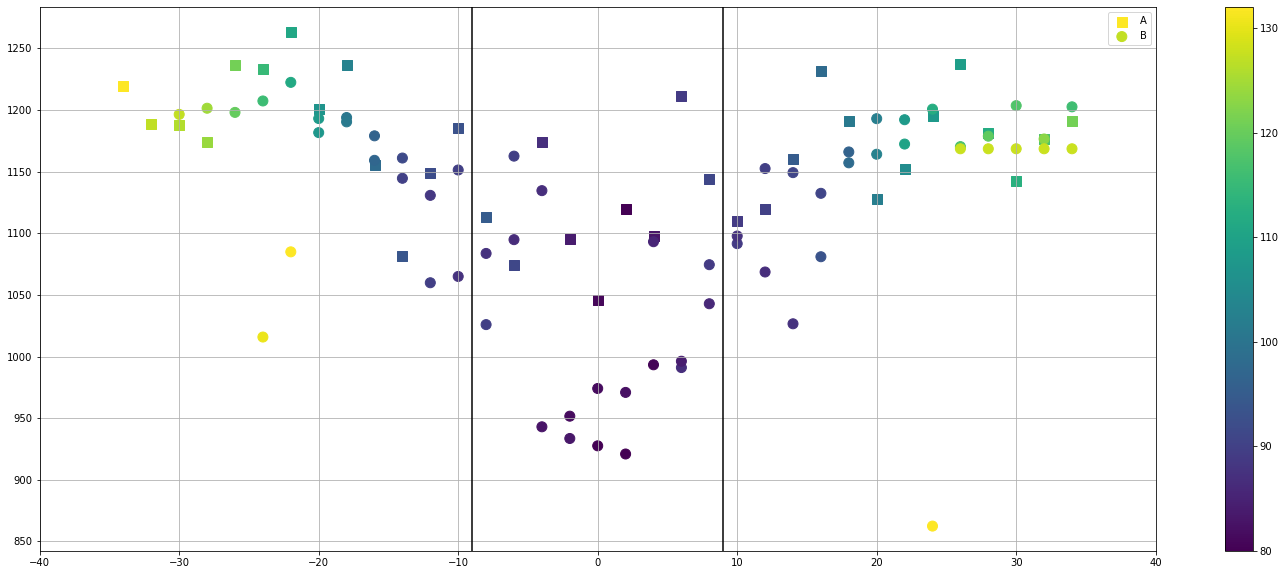

In [366]:
plot=postexplode.copy()
plot2=postexplode.copy()



plot=plot[plot['material']=='MC']
plot=plot[plot['plate_thickness']=='8']
#plot=plot[plot['running_number']=='iii']
plot=plot[plot['testspeed']=='x']
plot=plot[plot['senergie/GW']!='GW']
plot=plot[plot['senergie/GW']=='A']
plot=plot[plot['Rp'].astype(float)>700]
plot=plot[plot['Rp'].astype(float)<1500]
plot.dropna(axis=0,inplace=True)

plot2=plot2[plot2['material']=='MC']
plot2=plot2[plot2['plate_thickness']=='8']
#plot2=plot2[plot2['running_number']=='iii'
plot2=plot2[plot2['testspeed']=='x']
plot2=plot2[plot2['senergie/GW']!='GW']
plot2=plot2[plot2['senergie/GW']=='B']
plot2=plot2[plot2['Rp'].astype(float)>700]
plot2=plot2[plot2['Rp'].astype(float)<1500]
plot2.dropna(axis=0,inplace=True)

display(plot['senergie/GW'].unique())
#all.dropna(axis=0,inplace=True)
display(all)
print(all['y4'].max(),all['y4'].min())
#display('WWWWWWWWWWWWW',plot2['step_rp02'],'WWWWWWWWWWWWW')
display(plot['level_0'].unique())
display(plot2['level_0'].unique())
##scatterplot
fig,ax=plt.subplots(figsize=(25,10))
a=ax.scatter(plot.post.astype(float),plot.Rp.astype(float),marker='s',c=plot['step_rp02'].astype(int),s=100,label='A')
b=ax.scatter(plot2.post.astype(float),plot2.Rp.astype(float),marker='o',c=plot2['step_rp02'].astype(int),s=100,label='B')
ax.set_xlim(-40,40)
ax.axvline(-9,color='k')
ax.axvline(9,color='k')
plt.colorbar(a)
plt.grid()
plt.legend()
plt.show()
fig.savefig('MC_mm.png',dpi=500)

In [359]:
###parallel coordinatesplot
all=pd.DataFrame()
all['y1']=  plot.plate_thickness.astype(int)
all['y2']=  plot.post.astype(float)
all['y3']=  plot['senergie/GW'].map({'A':0.45,'B':0.3})
all['y4']=  plot.Rp.astype(float)
all['y5']=  plot['testspeed'].map({'x':10,'y':5})

y1= all['y1']
y3= all['y2']
y2= all['y3']
y4= all['y4']
y5= all['y5']

import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(all,
                              color="y4",
                              labels={"y1": "_plate_thickness",
                                      "y2": "position",
                                      "y3": "senergie",
                                      "y4": "Rp",
                                      'y5':'testspeed'},
                              color_continuous_scale=px.colors.sequential.Plasma,
                             )
fig.show()

In [337]:
"""for i in tests_df.index:
    plt.plot(posts,tests_df.loc[i,'Rp'])"""

"for i in tests_df.index:\n    plt.plot(posts,tests_df.loc[i,'Rp'])"

In [338]:
#display(list(tests_df.testspeed))

In [339]:
"""import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

fig, host = plt.subplots()

# create some dummy data
ynames = ['thickness', 'testspeed', 'pos', 'Rp']
N1, N2, N3 = 10, 5, 8
N = N1 + N2 + N3
category = np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)])
y1 = plot.plate_thickness.astype(int)

y2 = plot.post.astype(float)
y3=plot.testspeed.map({'x':10,'y':5})
y4 = plot.Rp.astype(float)
#y5 = np.random.uniform(0, 800, N)

all=pd.DataFrame({
    'y1':y1,
    'y2':y2,
    'y3':y3,
    'y4':y4


})
display(all)
all.dropna(axis=0,inplace=True)
all=all[all['y4']>0]
all=all[all['y4']<1500]
display(all)

y1=all['y1']
y2=all['y2']
y3=all['y3']
y4=all['y4']

# organize the data
ys = np.dstack([y1, y2, y3, y4])[0]
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05
dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]


axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Parallel Coordinates Plot', fontsize=18)

colors = plt.cm.tab10.colors
for j in range(N):
    # to just draw straight lines between the axes:
    # host.plot(range(ys.shape[1]), zs[j,:], c=colors[(category[j] - 1) % len(colors) ])

    # create bezier curves
    # for each axis, there will a control vertex at the point itself, one at 1/3rd towards the previous and one
    #   at one third towards the next axis; the first and last axis have one less control vertex
    # x-coordinate of the control vertices: at each integer (for the axes) and two inbetween
    # y-coordinate: repeat every point three times, except the first and last only twice
    verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    # for x,y in verts: host.plot(x, y, 'go') # to show the control points of the beziers
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=colors[category[j] - 1])
    host.add_patch(patch)
plt.tight_layout()
plt.show()"""

'import matplotlib.pyplot as plt\nfrom matplotlib.path import Path\nimport matplotlib.patches as patches\nimport numpy as np\n\nfig, host = plt.subplots()\n\n# create some dummy data\nynames = [\'thickness\', \'testspeed\', \'pos\', \'Rp\']\nN1, N2, N3 = 10, 5, 8\nN = N1 + N2 + N3\ncategory = np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)])\ny1 = plot.plate_thickness.astype(int)\n\ny2 = plot.post.astype(float)\ny3=plot.testspeed.map({\'x\':10,\'y\':5})\ny4 = plot.Rp.astype(float)\n#y5 = np.random.uniform(0, 800, N)\n\nall=pd.DataFrame({\n    \'y1\':y1,\n    \'y2\':y2,\n    \'y3\':y3,\n    \'y4\':y4\n\n\n})\ndisplay(all)\nall.dropna(axis=0,inplace=True)\nall=all[all[\'y4\']>0]\nall=all[all[\'y4\']<1500]\ndisplay(all)\n\ny1=all[\'y1\']\ny2=all[\'y2\']\ny3=all[\'y3\']\ny4=all[\'y4\']\n\n# organize the data\nys = np.dstack([y1, y2, y3, y4])[0]\nymins = ys.min(axis=0)\nymaxs = ys.max(axis=0)\ndys = ymaxs - ymins\nymins -= dys * 0.05  # add 5% padding below and above\nymaxs +

In [340]:
display(list(tests_df.columns))

['paths',
 'ok',
 'crack',
 'pos',
 'left_12-5',
 'step_start',
 'step_stop',
 'index',
 'material',
 'senergie/GW',
 'plate_thickness',
 'testspeed',
 'running_number',
 'data',
 '-35_-33_idxs',
 '-33_-31_idxs',
 '-31_-29_idxs',
 '-29_-27_idxs',
 '-27_-25_idxs',
 '-25_-23_idxs',
 '-23_-21_idxs',
 '-21_-19_idxs',
 '-19_-17_idxs',
 '-17_-15_idxs',
 '-15_-13_idxs',
 '-13_-11_idxs',
 '-11_-9 _idxs',
 '-9_-7  _idxs',
 '-7_-5  _idxs',
 '-5_-3  _idxs',
 '-3_-1  _idxs',
 '-1_1   _idxs',
 '1_3    _idxs',
 '3_5    _idxs',
 '5_7    _idxs',
 '7_9    _idxs',
 '9_11   _idxs',
 '11_13  _idxs',
 '13_15  _idxs',
 '15_17  _idxs',
 '17_19  _idxs',
 '19_21  _idxs',
 '21_23  _idxs',
 '23_25  _idxs',
 '25_27  _idxs',
 '27_29  _idxs',
 '29_31  _idxs',
 '31_33  _idxs',
 '33_35  _idxs',
 '-35_-33_strain_p1',
 '-33_-31_strain_p1',
 '-31_-29_strain_p1',
 '-29_-27_strain_p1',
 '-27_-25_strain_p1',
 '-25_-23_strain_p1',
 '-23_-21_strain_p1',
 '-21_-19_strain_p1',
 '-19_-17_strain_p1',
 '-17_-15_strain_p1',
 '-15_

In [341]:
"""i='QL_B_8xii_clipped_cut_lined'
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(posts,tests_df.loc[i,'Rp'])"""

"i='QL_B_8xii_clipped_cut_lined'\nfig,ax=plt.subplots(figsize=(15,10))\nax.plot(posts,tests_df.loc[i,'Rp'])"

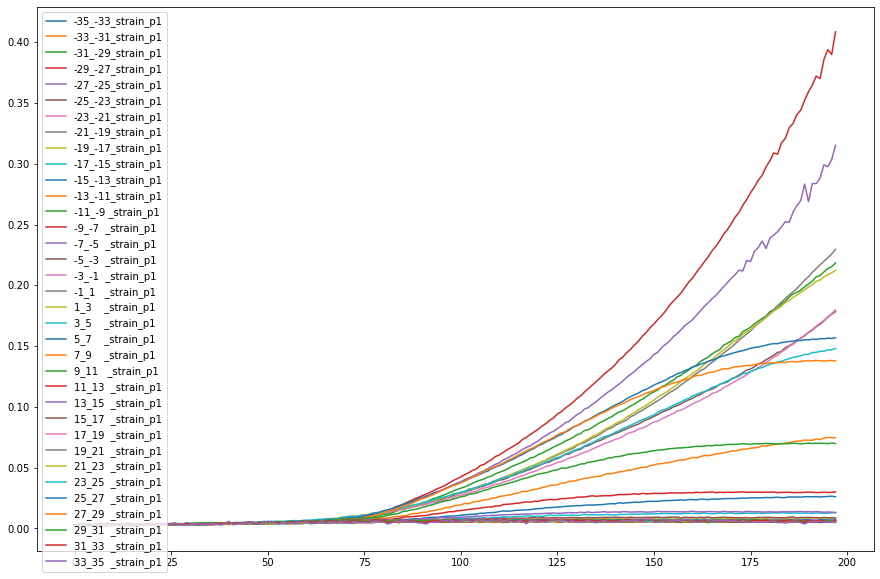

In [342]:
def contract():
    i='QL_B_8xii_clipped_cut_lined'
    fig,ax=plt.subplots(figsize=(15,10))
    ax.plot(tests_df.loc[i,'-35_-33_strain_p1'] ,label='-35_-33_strain_p1')
    ax.plot(tests_df.loc[i ,'-33_-31_strain_p1'],label='-33_-31_strain_p1')
    ax.plot(tests_df.loc[i ,'-31_-29_strain_p1'],label='-31_-29_strain_p1')
    ax.plot(tests_df.loc[i ,'-29_-27_strain_p1'],label='-29_-27_strain_p1')
    ax.plot(tests_df.loc[i ,'-27_-25_strain_p1'],label='-27_-25_strain_p1')
    ax.plot(tests_df.loc[i ,'-25_-23_strain_p1'],label='-25_-23_strain_p1')
    ax.plot(tests_df.loc[i ,'-23_-21_strain_p1'],label='-23_-21_strain_p1')
    ax.plot(tests_df.loc[i ,'-21_-19_strain_p1'],label='-21_-19_strain_p1')
    ax.plot(tests_df.loc[i ,'-19_-17_strain_p1'],label='-19_-17_strain_p1')
    ax.plot(tests_df.loc[i ,'-17_-15_strain_p1'],label='-17_-15_strain_p1')
    ax.plot(tests_df.loc[i ,'-15_-13_strain_p1'],label='-15_-13_strain_p1')
    ax.plot(tests_df.loc[i ,'-13_-11_strain_p1'],label='-13_-11_strain_p1')
    ax.plot(tests_df.loc[i ,'-11_-9 _strain_p1'],label='-11_-9 _strain_p1')
    ax.plot(tests_df.loc[i ,'-9_-7  _strain_p1'],label='-9_-7  _strain_p1')
    ax.plot(tests_df.loc[i ,'-7_-5  _strain_p1'],label='-7_-5  _strain_p1')
    ax.plot(tests_df.loc[i ,'-5_-3  _strain_p1'],label='-5_-3  _strain_p1')
    ax.plot(tests_df.loc[i ,'-3_-1  _strain_p1'],label='-3_-1  _strain_p1')
    ax.plot(tests_df.loc[i ,'-1_1   _strain_p1'],label='-1_1   _strain_p1')
    ax.plot(tests_df.loc[i ,'1_3    _strain_p1'],label='1_3    _strain_p1')
    ax.plot(tests_df.loc[i ,'3_5    _strain_p1'],label='3_5    _strain_p1')
    ax.plot(tests_df.loc[i ,'5_7    _strain_p1'],label='5_7    _strain_p1')
    ax.plot(tests_df.loc[i ,'7_9    _strain_p1'],label='7_9    _strain_p1')
    ax.plot(tests_df.loc[i ,'9_11   _strain_p1'],label='9_11   _strain_p1')
    ax.plot(tests_df.loc[i ,'11_13  _strain_p1'],label='11_13  _strain_p1')
    ax.plot(tests_df.loc[i ,'13_15  _strain_p1'],label='13_15  _strain_p1')
    ax.plot(tests_df.loc[i ,'15_17  _strain_p1'],label='15_17  _strain_p1')
    ax.plot(tests_df.loc[i ,'17_19  _strain_p1'],label='17_19  _strain_p1')
    ax.plot(tests_df.loc[i ,'19_21  _strain_p1'],label='19_21  _strain_p1')
    ax.plot(tests_df.loc[i ,'21_23  _strain_p1'],label='21_23  _strain_p1')
    ax.plot(tests_df.loc[i ,'23_25  _strain_p1'],label='23_25  _strain_p1')
    ax.plot(tests_df.loc[i ,'25_27  _strain_p1'],label='25_27  _strain_p1')
    ax.plot(tests_df.loc[i ,'27_29  _strain_p1'],label='27_29  _strain_p1')
    ax.plot(tests_df.loc[i ,'29_31  _strain_p1'],label='29_31  _strain_p1')
    ax.plot(tests_df.loc[i ,'31_33  _strain_p1'],label='31_33  _strain_p1')
    ax.plot(tests_df.loc[i ,'33_35  _strain_p1'],label='33_35  _strain_p1')
    ax.legend(loc='upper left')
    plt.show()
contract()

In [343]:
"""plot=plot[plot['material']=='MC']
plot=plot[plot['plate_thickness']=='6']
plot=plot[plot['senergie/GW']=='A']
y2 = plot.post.astype(float)
y3=plot.testspeed.map({'x':10,'y':5})
y4 = plot.Rp.astype(float)
#y5 = np.random.uniform(0, 800, N)

all=pd.DataFrame({
    'y1':y1,
    'y2':y2,
    'y3':y3,
    'y4':y4


})
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(all, color="y4", labels={"y1": "plate_thickness",
                "y2": "position", "y3": "test_speed",
                "y4": "Rp" },
                             color_continuous_scale='viridis',#px.colors.qualitative.Dark24,
                             color_continuous_midpoint=2)
fig.show()"""

'plot=plot[plot[\'material\']==\'MC\']\nplot=plot[plot[\'plate_thickness\']==\'6\']\nplot=plot[plot[\'senergie/GW\']==\'A\']\ny2 = plot.post.astype(float)\ny3=plot.testspeed.map({\'x\':10,\'y\':5})\ny4 = plot.Rp.astype(float)\n#y5 = np.random.uniform(0, 800, N)\n\nall=pd.DataFrame({\n    \'y1\':y1,\n    \'y2\':y2,\n    \'y3\':y3,\n    \'y4\':y4\n\n\n})\nimport plotly.express as px\ndf = px.data.iris()\nfig = px.parallel_coordinates(all, color="y4", labels={"y1": "plate_thickness",\n                "y2": "position", "y3": "test_speed",\n                "y4": "Rp" },\n                             color_continuous_scale=\'viridis\',#px.colors.qualitative.Dark24,\n                             color_continuous_midpoint=2)\nfig.show()'

In [344]:
i='QL_B_8xii_clipped_cut_lined'
display(tests_df.loc[i,'-15_-13_rp02'])

1096.754372965333